#simple model train

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

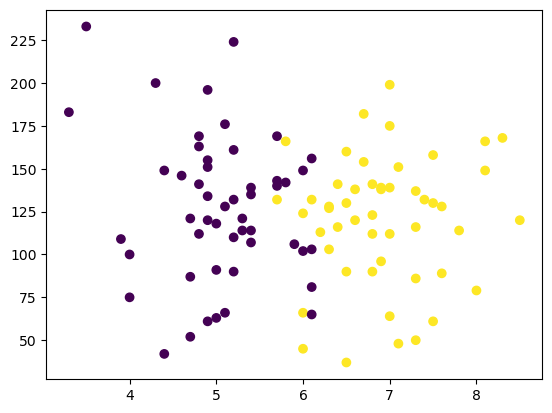

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
Y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.1)

In [13]:
x_train

,cgpa,iq
31,3.9,109.0
98,6.3,103.0
26,7.0,199.0
77,7.3,50.0
92,5.2,110.0
...,...,...
15,5.1,176.0
18,4.0,100.0
54,6.4,141.0
71,6.1,132.0


In [14]:
y_train

31    0
98    1
26    1
77    1
92    0
     ..
15    0
18    0
54    1
71    1
65    1
Name: placement, Length: 90, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler= StandardScaler()

In [17]:
x_train=scaler.fit_transform(x_train)

In [18]:
x_train

array([[-1.96977666, -0.38642548],
       [ 0.22111808, -0.54367473],
       [ 0.86012905,  1.97231331],
       [ 1.13399089, -1.93270979],
       [-0.78304201, -0.36021727],
       [-1.05690385,  1.89368868],
       [-0.69175473, -0.25538443],
       [-0.3266056 ,  1.18606705],
       [-1.14819113,  0.4522372 ],
       [ 0.67755448, -0.01951056],
       [ 0.49497992, -0.09813518],
       [ 1.31656545,  0.16394691],
       [-0.05274376,  0.66190287],
       [ 1.22527817,  0.21636332],
       [ 0.03854352,  0.84536033],
       [-1.05690385,  0.71431929],
       [ 0.03854352, -0.54367473],
       [ 1.86428913,  0.66190287],
       [-1.05690385, -1.6444195 ],
       [-1.14819113,  1.18606705],
       [-0.3266056 ,  0.50465362],
       [ 0.76884176,  0.37361258],
       [ 0.22111808,  0.11153049],
       [-0.60046745, -0.25538443],
       [-0.23531832,  1.10744242],
       [-0.96561657, -1.59200308],
       [-0.60046745,  0.39982078],
       [-0.78304201, -0.88438144],
       [ 0.76884176,

In [19]:
x_test=scaler.transform(x_test)
x_test

array([[-1.51334025,  0.66190287],
       [-0.69175473, -0.07192697],
       [-0.96561657, -0.85817323],
       [ 1.59042729, -0.25538443],
       [ 1.40785273, -0.91058965],
       [-2.51750034,  1.55298197],
       [-1.51334025, -2.14237546],
       [-0.87432929, -1.51337845],
       [-0.78304201,  2.62751853],
       [-0.23531832,  0.47844541]])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf=LogisticRegression()

In [22]:
clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred= clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
y_test

88    0
2     0
25    0
55    1
42    1
17    0
96    0
9     0
16    0
4     0
Name: placement, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

1.0

In [27]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [28]:
pip show mlxtend

Name: mlxtend
Version: 0.23.1
Summary: Machine Learning Library Extensions
Home-page: 
Author: 
Author-email: Sebastian Raschka <mail@sebastianraschka.com>
License: BSD 3-Clause
Location: C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

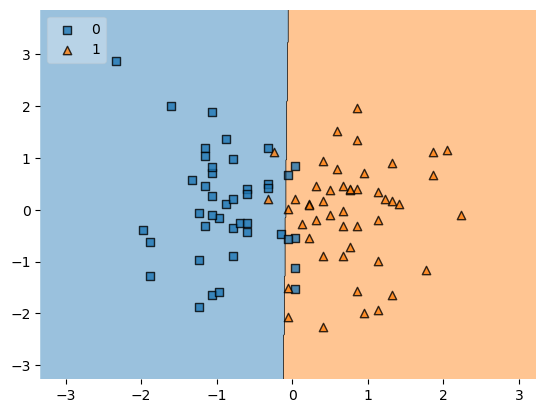

In [30]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)